In [20]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import hist
from hist import Hist
import mplhep as hep
import math

f = uproot.open("/home/submit/marinamn/fccee/FCCAnalyzer/tmp/output_hadron_xsec.root")

def qq(key):
    #f = uproot.open("/home/submit/marinamn/fccee/FCCAnalyzer/tmp/output_hadron_xsec.root")
    qq = f[f"kkmc_ee_uu_ecm91p2/{key}"].to_hist()+ f[f"kkmc_ee_dd_ecm91p2/{key}"].to_hist()+f[f"kkmc_ee_cc_ecm91p2/{key}"].to_hist() +f[f"kkmc_ee_ss_ecm91p2/{key}"].to_hist() + f[f"kkmc_ee_bb_ecm91p2/{key}"].to_hist()
    return qq

In [21]:
def plot(number,samples,key,name,xlabel_name,ylabel_name = "Events",legend_loc = "best",stack_yn = True,fill_yn = "fill", lim = None, yscale_yn = True, save = False):
    
    histograms = []
    labels = []
    colors = []
    
    sample_dict = {"wzp_qq": "wzp6_ee_qq_ecm91p2", "mu": "wzp6_ee_mumu_ecm91p2", "tau": "wzp6_ee_tautau_ecm91p2", "e": "p8_ee_Zee_ecm91", "gaga":"wzp6_gaga_qq_5_ecm91p2","p8_mu": "p8_ee_Zmumu_ecm91", "p8_tau": "p8_ee_Ztautau_ecm91", "uu": "kkmc_ee_uu_ecm91p2", "dd": "kkmc_ee_dd_ecm91p2", "cc": "kkmc_ee_cc_ecm91p2", "ss": "kkmc_ee_ss_ecm91p2", "bb": "kkmc_ee_bb_ecm91p2"}
    label_dict = {"qq": r"$e^{+} e^{-} \rightarrow q \bar{q}$, KKMC", "wzp_qq": r"$e^{+} e^{-} \rightarrow q \bar{q}$, Whizard", "mu": r"$e^{+} e^{-} \rightarrow \mu^{+} \mu^{-}$, Whizard", "tau": r"$e^{+} e^{-} \rightarrow \tau^{+} \tau^{-}$, Whizard", "e": r"$e^{+} e^{-} \rightarrow e^{+} e^{-}$, Pythia", "gaga":r"$e^{+} e^{-} \rightarrow e^{+} e^{-}$ hadrons, Whizard","p8_mu": r"$e^{+} e^{-} \rightarrow \mu^{+} \mu^{-}$, Pythia", "p8_tau": r"$e^{+} e^{-} \rightarrow \tau^{+} \tau^{-}$, Pythia", "uu": r"$e^{+} e^{-} \rightarrow u \bar{u}$, KKMC", "dd": r"$e^{+} e^{-} \rightarrow d \bar{d}$, KKMC", "cc": r"$e^{+} e^{-} \rightarrow c \bar{c}$, KKMC", "ss": r"$e^{+} e^{-} \rightarrow s \bar{s}$, KKMC", "bb": r"$e^{+} e^{-} \rightarrow b \bar{b}$, KKMC"}
    color_dict = {"qq": "paleturquoise", "wzp_qq": "darkviolet", "mu": "red", "tau": "limegreen", "e": "yellow", "gaga":"pink","p8_mu": "sandybrown", "p8_tau": "darkolivegreen", "uu": "moccasin", "dd": "chocolate", "cc": "magenta", "ss": "palegreen", "bb": "deepskyblue"}
                   
    for i in range (0,number):
        if samples[i] == "qq":
            histograms.append(qq(key))
        else:
            histograms.append(f[f"{sample_dict[samples[i]]}/{key}"].to_hist())
        labels.append(f"{label_dict[samples[i]]}")
        colors.append(f"{color_dict[samples[i]]}")
                   
    hep.histplot(histograms, label = labels, color = colors, stack = stack_yn, histtype = fill_yn)
                   
    if yscale_yn:
        plt.yscale("log")
    if lim != None:
        plt.xlim(lim[0],lim[1])
    plt.xlabel(xlabel_name)
    plt.ylabel(ylabel_name)
    plt.legend(loc = legend_loc)
    plt.title(r"$\sqrt{s} = 91.2 $ GeV, 75 ab$^{-1}$", loc = "right")
    plt.title("FCC-ee simulation", loc = "left", weight = "bold")
                   
    if save:
        plt.savefig(f"images/{name}.png")

Text(0.0, 1.0, 'FCC-ee simulation')

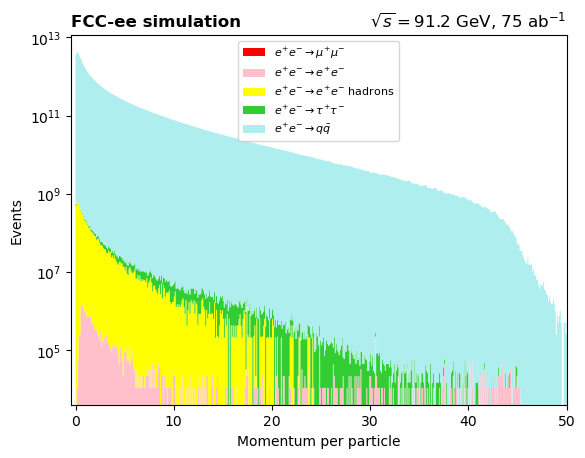

In [22]:
p_wzp = f['wzp6_ee_qq_ecm91p2/RP_p'].to_hist()
p = qq("RP_p")
mu_p = f['wzp6_ee_mumu_ecm91p2/RP_p'].to_hist()
e_p = f["p8_ee_Zee_ecm91/RP_p"].to_hist()
tau_p = f['wzp6_ee_tautau_ecm91p2/RP_p'].to_hist()
gaga_p = f['wzp6_gaga_qq_5_ecm91p2/RP_p'].to_hist()

hep.histplot([mu_p,e_p, gaga_p, tau_p, p], label = [r"$e^{+} e^{-} \rightarrow \mu^{+} \mu^{-}$",r"$e^{+} e^{-} \rightarrow e^{+} e^{-}$",
                      r"$e^{+} e^{-} \rightarrow e^{+} e^{-}$ hadrons", r"$e^{+} e^{-} \rightarrow \tau^{+} \tau^{-}$",
                                               r"$e^{+} e^{-} \rightarrow q \bar{q}$"], 
             stack = True, histtype = "fill", color = ["red","pink","yellow", "limegreen", "paleturquoise"])

plt.xlim(-0.5,50)
plt.yscale("log")
plt.xlabel("Momentum per particle")
plt.legend(loc = "upper center", fontsize = "8")
plt.ylabel("Events")
plt.title(r"$\sqrt{s} = 91.2 $ GeV, 75 ab$^{-1}$", loc = "right")
plt.title("FCC-ee simulation", loc = "left", weight = "bold")
#plt.savefig("images/kkmc_all_p_per_particle.png")

In [24]:
# e_wzp = f['wzp6_ee_qq_ecm91p2/RP_e'].to_hist()
# e = qq("RP_e")
# mu_e = f['wzp6_ee_mumu_ecm91p2/RP_e'].to_hist()
# e_e = f["p8_ee_Zee_ecm91/RP_e"].to_hist()
# tau_e = f['wzp6_ee_tautau_ecm91p2/RP_e'].to_hist()
# gaga_e = f['wzp6_gaga_qq_5_ecm91p2/RP_e'].to_hist()

# hep.histplot([mu_p,e_p, gaga_p, tau_p, p], label = [r"$e^{+} e^{-} \rightarrow \mu^{+} \mu^{-}$",r"$e^{+} e^{-} \rightarrow e^{+} e^{-}$",
#                       r"$e^{+} e^{-} \rightarrow e^{+} e^{-}$ hadrons", r"$e^{+} e^{-} \rightarrow \tau^{+} \tau^{-}$",
#                                                r"$e^{+} e^{-} \rightarrow q \bar{q}$"], 
#              stack = True, histtype = "fill", color = ["red","pink","yellow", "limegreen", "paleturquoise"])

# plt.xlim(-0.5,50)
# plt.yscale("log")
# plt.xlabel("Energy per particle")
# plt.legend(loc = "upper center", fontsize = "8")
# plt.ylabel("Events")
# plt.title(r"$\sqrt{s} = 91.2 $ GeV, 75 ab$^{-1}$", loc = "right")
# plt.title("FCC-ee simulation", loc = "left", weight = "bold")
# #plt.savefig("images/kkmc_all_e_per_particle.png")

Text(0.0, 1.0, 'FCC-ee simulation')

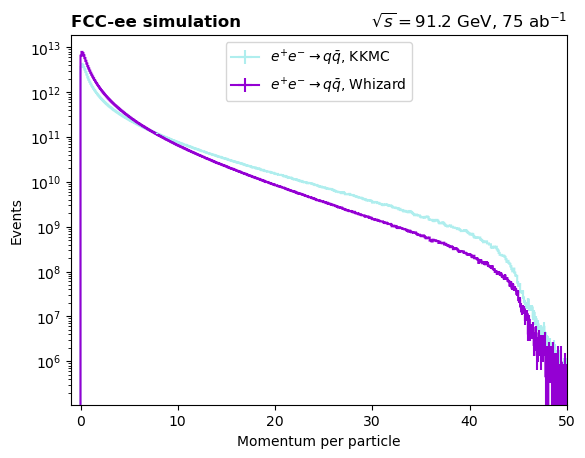

In [25]:
hep.histplot([p,p_wzp], label = [r"$e^{+} e^{-} \rightarrow q \bar{q}$, KKMC",r"$e^{+} e^{-} \rightarrow q \bar{q}$, Whizard"], 
             stack = False, color = ["paleturquoise", "darkviolet"])
plt.xlabel("Momentum per particle")
plt.legend(loc = "upper center")
plt.ylabel("Events")
plt.yscale("log")
plt.xlim(-1,50)
plt.title(r"$\sqrt{s} = 91.2 $ GeV, 75 ab$^{-1}$", loc = "right")
plt.title("FCC-ee simulation", loc = "left", weight = "bold")
#plt.savefig("images/kkmc_wzp_qq_p_per_particle.png")

Text(0.0, 1.0, 'FCC-ee simulation')

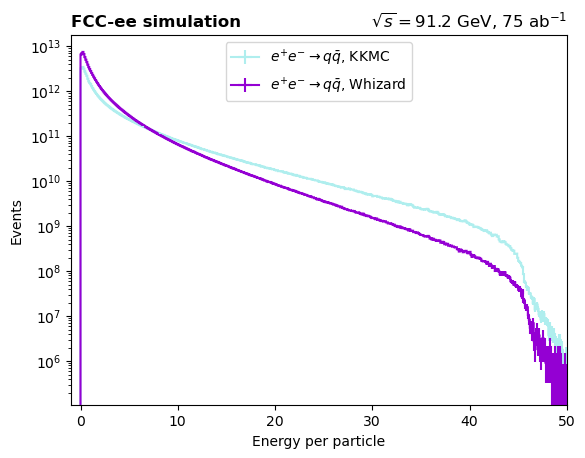

In [26]:
hep.histplot([e,e_wzp], label = [r"$e^{+} e^{-} \rightarrow q \bar{q}$, KKMC",r"$e^{+} e^{-} \rightarrow q \bar{q}$, Whizard"], 
             stack = False, color = ["paleturquoise", "darkviolet"])
plt.xlim(-1,50)
plt.yscale("log")
plt.xlabel("Energy per particle")
plt.legend(loc = "upper center")
plt.ylabel("Events")
plt.title(r"$\sqrt{s} = 91.2 $ GeV, 75 ab$^{-1}$", loc = "right")
plt.title("FCC-ee simulation", loc = "left", weight = "bold")
#plt.savefig("images/kkmc_wzp_qq_e_per_particle.png")

Text(0.5, 0, 'Whizard: Energy per particle')

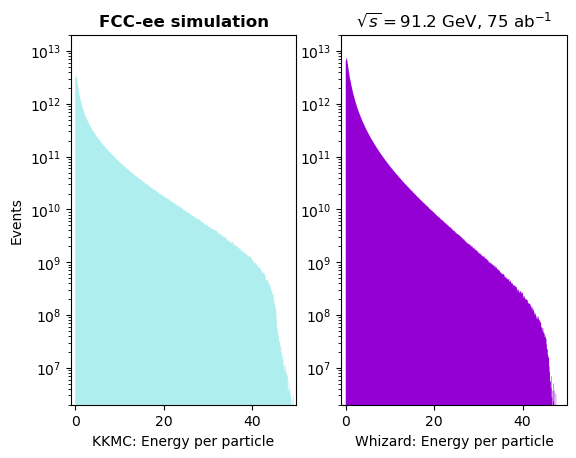

In [27]:
e_y,e_x = e.to_numpy()
ewzp_y,ewzp_x = e_wzp.to_numpy()


fig, (ax1, ax2) = plt.subplots(1, 2)
ax2.set_title(r"$\sqrt{s} = 91.2 $ GeV, 75 ab$^{-1}$")
ax1.stairs(e_y,e_x, color = "paleturquoise",label = r"KKMC: Energy per particle, $e^{+} e^{-} \rightarrow q \bar{q}$", fill = True)
ax1.set_yscale("log")
ax1.set_xlim(-1,50)
ax1.set_ylim(2e6,2e13)
ax1.set_xlabel(r"KKMC: Energy per particle")
ax1.set_ylabel("Events")

ax1.set_title("FCC-ee simulation", weight = "bold")
ax2.stairs(ewzp_y,ewzp_x, color = "darkviolet",label = r"Whizard: Energy per particle, $e^{+} e^{-} \rightarrow q \bar{q}$", fill = True)
ax2.set_yscale("log")
ax2.set_xlim(-1,50)
ax2.set_ylim(2e6,2e13)
ax2.set_xlabel(r"Whizard: Energy per particle")

#plt.savefig("images/kkmc_wzp_sidecomp_e_particle.png")

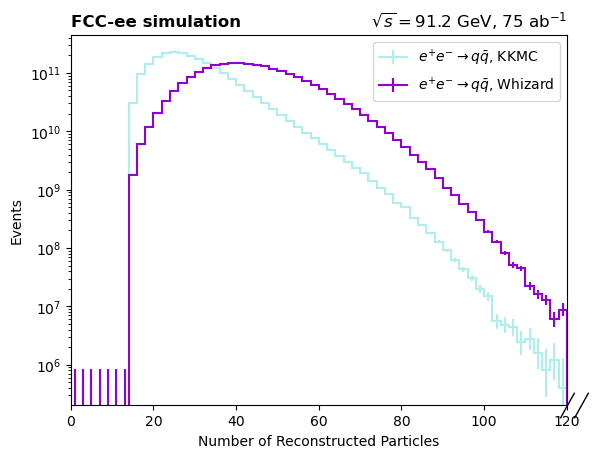

In [28]:
plot(2,["qq","wzp_qq"],"RP_no","kkmc_wzp_RP_no","Number of Reconstructed Particles", legend_loc = "upper right", stack_yn = False, fill_yn = "step", lim = [0,120])




Text(0.5, 0, 'Whizard: Number of Particles')

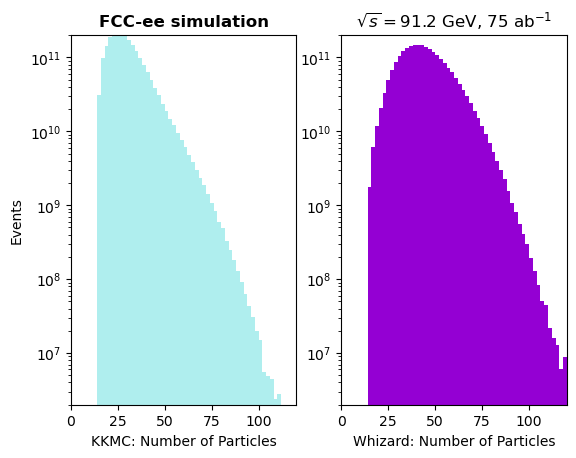

In [29]:
no_wzp = f['wzp6_ee_qq_ecm91p2/RP_no'].to_hist()
no = qq("RP_no")
no_y,no_x = no.to_numpy()
nowzp_y,nowzp_x = no_wzp.to_numpy()


fig, (ax1, ax2) = plt.subplots(1, 2)
ax2.set_title(r"$\sqrt{s} = 91.2 $ GeV, 75 ab$^{-1}$")
ax1.stairs(no_y,no_x, color = "paleturquoise",label = r"KKMC: Energy per particle, $e^{+} e^{-} \rightarrow q \bar{q}$", fill = True)
ax1.set_yscale("log")
ax1.set_xlim(0,120)
ax1.set_ylim(2e6,2e11)
ax1.set_xlabel(r"KKMC: Number of Particles")
ax1.set_ylabel("Events")

ax1.set_title("FCC-ee simulation", weight = "bold")
ax2.stairs(nowzp_y,nowzp_x, color = "darkviolet",label = r"Whizard: Energy per particle, $e^{+} e^{-} \rightarrow q \bar{q}$", fill = True)
ax2.set_yscale("log")
ax2.set_xlim(0,120)
ax2.set_ylim(2e6,2e11)
ax2.set_xlabel(r"Whizard: Number of Particles")

#plt.savefig("images/kkmc_wzp_sidecomp_no.png")

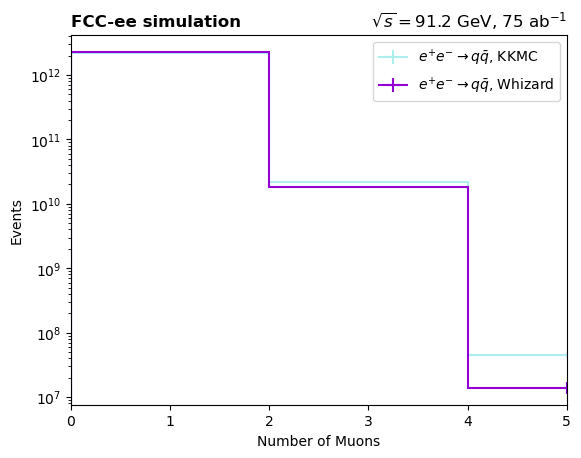

In [30]:
plot(2,["qq","wzp_qq"],"muons_no","kkmc_wzp_muons_no","Number of Muons", legend_loc = "upper right", stack_yn = False, fill_yn = "step", lim = [0,5])




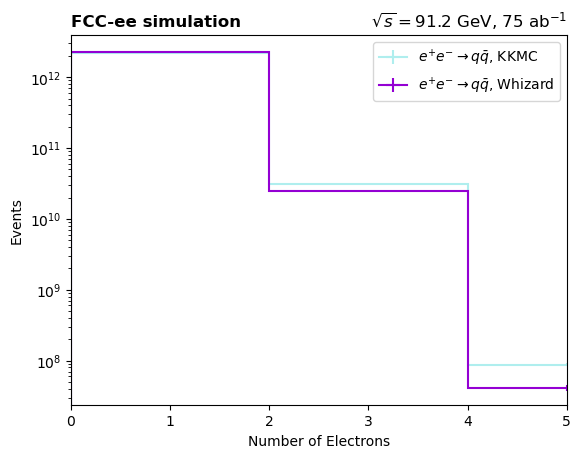

In [31]:
plot(2,["qq","wzp_qq"],"electrons_no","kkmc_wzp_electrons_no","Number of Electrons", legend_loc = "upper right", stack_yn = False, fill_yn = "step", lim = [0,5])




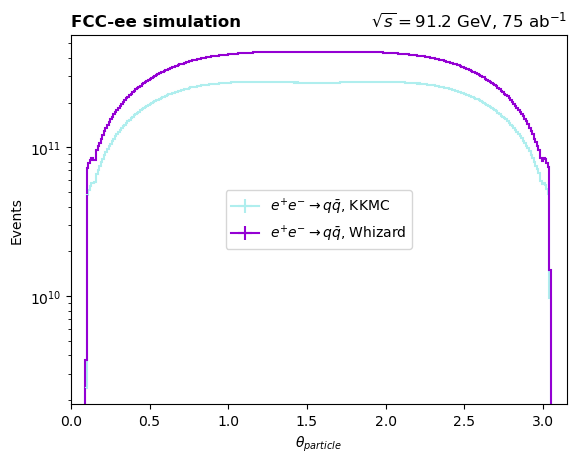

In [32]:
plot(2,["qq","wzp_qq"],"RP_theta","kkmc_wzp_theta",r"$ \theta_{particle} $", legend_loc = "center", stack_yn = False, fill_yn = "step", lim = [0,3.15])




Text(0.5, 0, 'Whizard: Number of Neutral Particles')

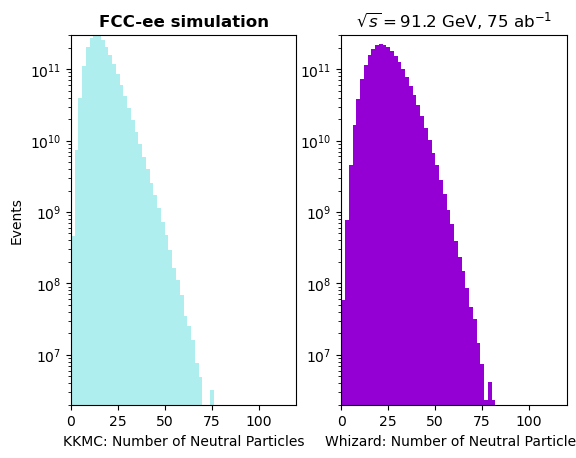

In [33]:
no_wzp = f['wzp6_ee_qq_ecm91p2/n_neutral'].to_hist()
no = qq("n_neutral")
no_y,no_x = no.to_numpy()
nowzp_y,nowzp_x = no_wzp.to_numpy()


fig, (ax1, ax2) = plt.subplots(1, 2)
ax2.set_title(r"$\sqrt{s} = 91.2 $ GeV, 75 ab$^{-1}$")
ax1.stairs(no_y,no_x, color = "paleturquoise",label = r"KKMC: Energy per particle, $e^{+} e^{-} \rightarrow q \bar{q}$", fill = True)
ax1.set_yscale("log")
ax1.set_xlim(0,120)
ax1.set_ylim(2e6,3e11)
ax1.set_xlabel(r"KKMC: Number of Neutral Particles")
ax1.set_ylabel("Events")

ax1.set_title("FCC-ee simulation", weight = "bold")
ax2.stairs(nowzp_y,nowzp_x, color = "darkviolet",label = r"Whizard: Energy per particle, $e^{+} e^{-} \rightarrow q \bar{q}$", fill = True)
ax2.set_yscale("log")
ax2.set_xlim(0,120)
ax2.set_ylim(2e6,3e11)
ax2.set_xlabel(r"Whizard: Number of Neutral Particles")

#plt.savefig("images/kkmc_wzp_sidecomp_n_neutral.png")

Text(0.5, 0, 'Whizard: Number of Charged Particles')

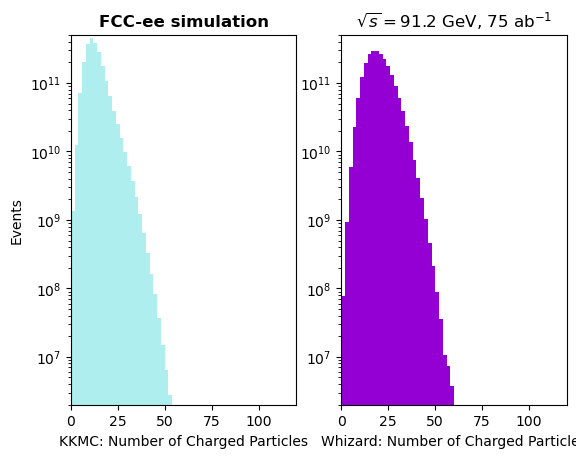

In [34]:
no_wzp = f['wzp6_ee_qq_ecm91p2/n_charged'].to_hist()
no = qq("n_charged")
no_y,no_x = no.to_numpy()
nowzp_y,nowzp_x = no_wzp.to_numpy()


fig, (ax1, ax2) = plt.subplots(1, 2)
ax2.set_title(r"$\sqrt{s} = 91.2 $ GeV, 75 ab$^{-1}$")
ax1.stairs(no_y,no_x, color = "paleturquoise",label = r"KKMC: Energy per particle, $e^{+} e^{-} \rightarrow q \bar{q}$", fill = True)
ax1.set_yscale("log")
ax1.set_xlim(0,120)
ax1.set_ylim(2e6,5e11)
ax1.set_xlabel(r"KKMC: Number of Charged Particles")
ax1.set_ylabel("Events")

ax1.set_title("FCC-ee simulation", weight = "bold")
ax2.stairs(nowzp_y,nowzp_x, color = "darkviolet",label = r"Whizard: Energy per particle, $e^{+} e^{-} \rightarrow q \bar{q}$", fill = True)
ax2.set_yscale("log")
ax2.set_xlim(0,120)
ax2.set_ylim(2e6,5e11)
ax2.set_xlabel(r"Whizard: Number of Charged Particles")

#plt.savefig("images/kkmc_wzp_sidecomp_n_charged.png")

In [36]:
# plot(2,["qq","wzp_qq"],"cos_thetat","kkmc_wzp_cos_thetat",r"$ cos$ $\theta_{thrust} $", legend_loc = "center", stack_yn = False, fill_yn = "step",lim = [0.9,1.01])




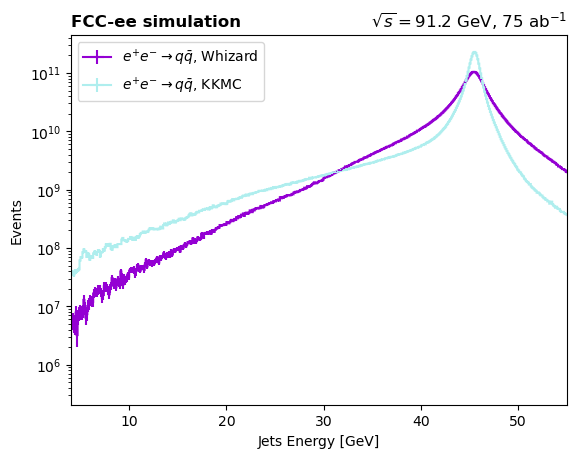

In [37]:
plot(2,["wzp_qq","qq"],"jets_e","kkmc_wzp_jets_e","Jets Energy [GeV]", legend_loc = "upper left", stack_yn = False,lim = [4,55], fill_yn = "step", save = True)



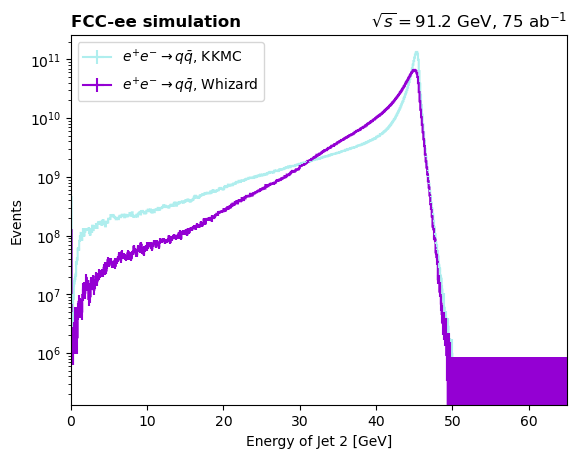

In [38]:
plot(2,["qq","wzp_qq"],"e2","kkmc_wzp_e2","Energy of Jet 2 [GeV]", legend_loc = "upper left", stack_yn = False,lim = [0,65], fill_yn = "step")


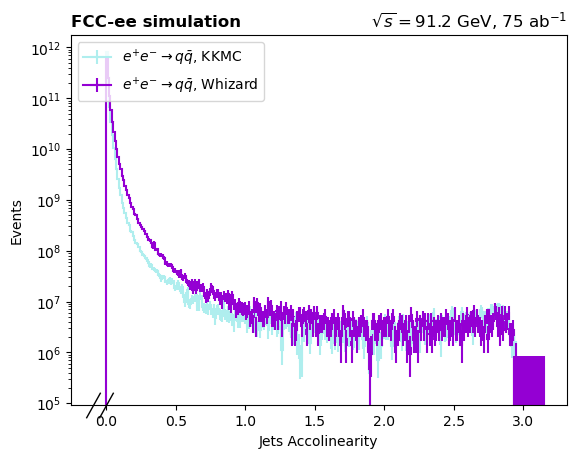

In [39]:
plot(2,["qq","wzp_qq"],"jets_acol","kkmc_wzp_jets_acol","Jets Accolinearity", legend_loc = "upper left", stack_yn = False, fill_yn = "step")



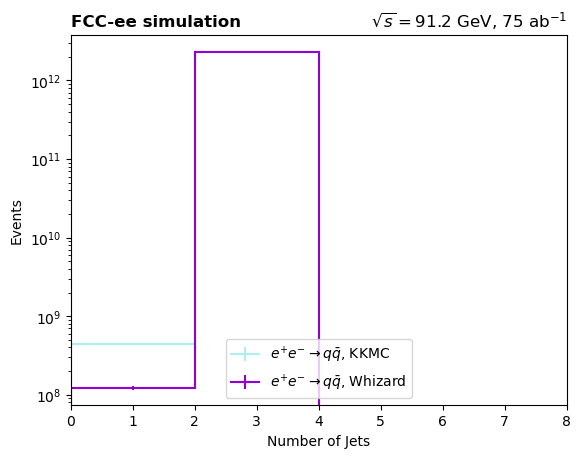

In [40]:
plot(2,["qq","wzp_qq"],"njets","kkmc_wzp_njets_0.5_5","Number of Jets", legend_loc = "lower center", stack_yn = False,lim = [0,8], fill_yn = "step", save = True)

